# Loading data

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # sklearn is a package of Scikit-learn that contains the tree module that contains DecisionTreeClassifier class which implements the decision tree algorithm 
from sklearn.model_selection import train_test_split # helps split data into 2 sets - training and test sets
from sklearn.metrics import accuracy_score
# from sklearn.externals import joblib # for saving and loading models
import joblib
from sklearn import tree # used to export DT in graphical format

music_data = pd.read_csv("music.csv")
music_data.head(7)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical


# Cleaning/Preparing Data

In [3]:
#  Splitting the dataset columns as input/output
X = music_data.drop(columns=["genre"]) # creates a new df without that column
X.head()
y = music_data["genre"]
y.tail()

13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

# Building a Model using a machine learning algorithm

Decision Tree(easiest to understand) - using SciKit-Learn

In [4]:
# Creating a new instance of class DecisionTreeClassifier
model = DecisionTreeClassifier()

In [5]:
# Train the model so it can learn patterns in data
model.fit(X,y)

DecisionTreeClassifier()

In [6]:
# Prediction
predictions = model.predict([[21,1],[22,0]])
predictions

c:\Users\Enid\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

# Measuring accuracy of a model

In [7]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # returns tuple

In [8]:
# Train on training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
# Predictions on testing data
predictions = model.predict(X_test)

In [10]:
# Comparing predictions with actual values in test
score = accuracy_score(y_test, predictions)
score

0.5

In [11]:
print("The accuracy score is {}%".format(score*100))

The accuracy score is 50.0%


# Visualizing Decision Trees

[Text(0.625, 0.875, 'age <= 31.5\ngini = 0.786\nsamples = 14\nvalue = [3, 4, 2, 2, 3]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.74\nsamples = 10\nvalue = [3, 0, 2, 2, 3]\nclass = Acoustic'),
 Text(0.25, 0.375, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0, 0]\nclass = Acoustic'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.75, 0.375, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 2, 3]\nclass = Jazz'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]\nclass = HipHop'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0]\nclass = Classical')]

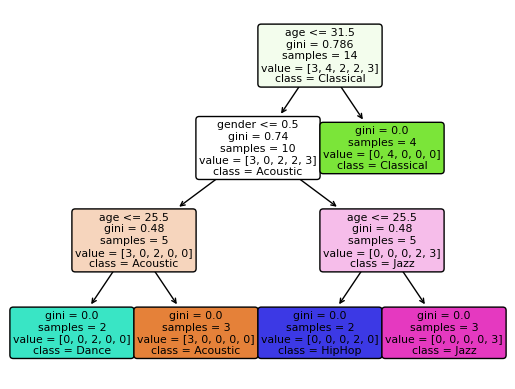

In [12]:
# tree.export_graphviz(model, out_file="music-recommender.dot", feature_names=["age","gender"], class_names= sorted(y.unique()), label="all", rounded=True, filled=True) 
# dot format - graph description language - textual language for describing graphs -> requires dot extension in vscode to visualize
# .unique -> unique list of classes

tree.plot_tree(model, feature_names=["age","gender"], class_names= sorted(y.unique()), label="all", rounded=True, filled=True) 


# Persisting a Model

In [13]:
joblib.dump(model, "music-recommender.joblib")

['music-recommender.joblib']

In [14]:
# loading the model
model = joblib.load("music-recommender.joblib")

predictions = model.predict([[21,1]])
predictions

c:\Users\Enid\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)